# Rf 7 0 3_Effpdfprod

Special p.d.f.'s: using a product of an (acceptance) efficiency and a p.d.f as p.d.f.




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:01 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Define observables and decay pdf
---------------------------------------------------------------

Declare observables

In [2]:
t = ROOT.RooRealVar("t", "t", 0, 5)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Make pdf

In [3]:
tau = ROOT.RooRealVar("tau", "tau", -1.54, -4, -0.1)
model = ROOT.RooExponential("model", "model", t, tau)

Define efficiency function
---------------------------------------------------

Use error function to simulate turn-on slope

In [4]:
eff = ROOT.RooFormulaVar(
    "eff",
    "0.5*(TMath::Erf((t-1)/0.5)+1)",
    ROOT.RooArgList(t))

Define decay pdf with efficiency
---------------------------------------------------------------

Multiply pdf(t) with efficiency in t

In [5]:
modelEff = ROOT.RooEffProd("modelEff", "model with efficiency", model, eff)

Plot efficiency, pdf
----------------------------------------

In [6]:
frame1 = t.frame(ROOT.RooFit.Title("Efficiency"))
eff.plotOn(frame1, ROOT.RooFit.LineColor(ROOT.kRed))

frame2 = t.frame(ROOT.RooFit.Title("Pdf with and without efficiency"))

model.plotOn(frame2, ROOT.RooFit.LineStyle(ROOT.kDashed))
modelEff.plotOn(frame2)

<ROOT.RooPlot object ("frame_t_55b72644cb90") at 0x55b72644cb90>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(modelEff_clone_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)


Generate toy data, fit model eff to data
------------------------------------------------------------------------------

Generate events. If the input pdf has an internal generator, internal generator
is used and an accept/reject sampling on the efficiency is applied.

In [7]:
data = modelEff.generate(ROOT.RooArgSet(t), 10000)

Fit pdf. The normalization integral is calculated numerically.

In [8]:
modelEff.fitTo(data)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(modelEff_clone_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (eff)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 tau         -1.54000e+00  3.90000e-01   -4.00000e+00 -1.00000e-01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRAT

Plot generated data and overlay fitted pdf

In [9]:
frame3 = t.frame(ROOT.RooFit.Title("Fitted pdf with efficiency"))
data.plotOn(frame3)
modelEff.plotOn(frame3)

c = ROOT.TCanvas("rf703_effpdfprod", "rf703_effpdfprod", 1200, 400)
c.Divide(3)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.4)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.6)
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.6)
frame3.Draw()

c.SaveAs("rf703_effpdfprod.png")

[#1] INFO:NumericIntegration -- RooRealIntegral::init(modelEff_clone_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)


Info in <TCanvas::Print>: png file rf703_effpdfprod.png has been created


Draw all canvases 

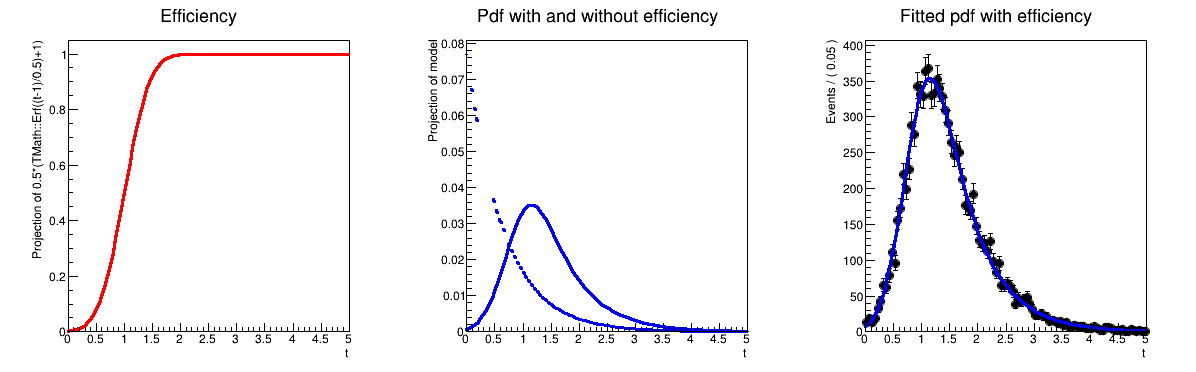

In [10]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()